# Eight Queens Genetic Algorithim

a) generate population

In [1]:
from BasicGaAlgorithim import generate_population

generate_population(3, 3)

[[2, 1, 0], [0, 0, 0], [0, 2, 2]]

b) fitness function

In [2]:
from BasicGaAlgorithim import fitness_function

assert fitness_function([7,1,4,2,0,6,3,5]) == 28
assert fitness_function([7,2,4,2,0,6,3,2]) == 23
assert fitness_function([1,1,1,1,0,6,3,2]) == 19
assert fitness_function([1,1,1,1,1,1,1,1]) == 0
assert fitness_function([1,2,3,4,5,6,7,8]) == 0

c)	selection:

In [3]:
from BasicGaAlgorithim import selection


population = generate_population(3, 5)
fitness_scores = [fitness_function(genotype) for genotype in population]
print("initial populations:")
print(population)
print("fitness scores:")
print(fitness_scores)
print("selected parents")
selection(population, fitness_scores, 3)


initial populations:
[[2, 2, 0], [1, 0, 0], [0, 1, 2], [0, 2, 0], [0, 0, 0]]
fitness scores:
[1.0, 1.0, 0.0, 2.0, 0.0]
selected parents


[([2, 2, 0], [0, 2, 0]), ([0, 2, 0], [2, 2, 0]), ([1, 0, 0], [2, 2, 0])]

d)	Crossover

In [4]:
from BasicGaAlgorithim import crossover


population = generate_population(3, 3)
fitness_scores = [fitness_function(genotype) for genotype in population]
selected_parents = selection(population, fitness_scores, 3)

print("selected parents")
print(selected_parents)
print("offspring")

crossover(selected_parents, 3)

selected parents
[([0, 2, 0], [2, 0, 0]), ([0, 2, 0], [2, 0, 0]), ([0, 2, 0], [2, 0, 0])]
offspring


[[2, 0, 0], [2, 0, 0], [0, 0, 0]]

e)  mutation

In [5]:
from BasicGaAlgorithim import mutation


population = generate_population(3, 3)
fitness_scores = [fitness_function(genotype) for genotype in population]
selected_parents = selection(population, fitness_scores, 3)
offspring = crossover(selected_parents, 3)
print("offspring")
print(offspring)
print("mutated")

mutation(population, 2, 3)

offspring
[[0, 1, 2], [2, 1, 2], [2, 1, 2]]
mutated


[[0, 1, 0], [0, 2, 2], [2, 1, 2]]

check for completion and calclate perfect score

In [6]:
from BasicGaAlgorithim import check_for_perfect_genotype, calculate_perfect_score

# print(check_for_perfect_genotype([7,1,4,2,0,6,3,5]))
print(calculate_perfect_score(8))

28.0


generation

In [7]:

def generation(population, size_of_population, number_of_queens, mutation_frequency):
    # b) fitness function
    fit_scores = [fitness_function(genotype) for genotype in population]

    # c) selection
    selected_pairs = selection(population, fit_scores, size_of_population)
    
    # d) cross over
    children = crossover(selected_pairs, number_of_queens)

    # e) mutation
    mutated = mutation(children, mutation_frequency, number_of_queens)

    return mutated

# a) Initial Population
population = generate_population(3, 3)
generation(population, 3, 3, 2)


[[2, 2, 2], [2, 0, 2], [0, 2, 2]]

Full algorithim

In [8]:
import timeit

NUMBER_OF_QUEENS=8
SIZE_OF_POPULATION=25
MUTATION_FREQUENCY = 8
# TODO HOW IS THIS CALCULATED
PERFECT_SCORE = calculate_perfect_score(NUMBER_OF_QUEENS)


def genetic_algorithm(population):

    start_time = timeit.default_timer()

    gen = 0
    completed_genotype = []

    # # g) check if it has found correct state and exit loop
    while not completed_genotype:
        population = generation(population, SIZE_OF_POPULATION, NUMBER_OF_QUEENS, MUTATION_FREQUENCY)
        completed_genotype = check_for_perfect_genotype(population, PERFECT_SCORE)
        gen += 1

        if gen == 100000:
            break

    stop_time = timeit.default_timer()

    return {
        "elapsed_time": stop_time - start_time,
        "number_of_generations": gen,
        "completed_state": completed_genotype
    }

# a) generate initial population
population = generate_population(NUMBER_OF_QUEENS, SIZE_OF_POPULATION)

ga_result = genetic_algorithm(population)

ga_result

{'elapsed_time': 0.5209371999999348,
 'number_of_generations': 286,
 'completed_state': [4, 1, 5, 0, 6, 3, 7, 2]}

In [9]:
# # generate test population
# # only need to do this once

# import pickle


# # generate test populations

# test_population = []

# for i in range(100):
#         test_population.append( generate_population(NUMBER_OF_QUEENS, SIZE_OF_POPULATION))

# with open(test_populations_name, 'wb') as f:
#         pickle.dump(test_population, f)

In [11]:
# run algo on all test populations

import pickle

test_populations_name = 'testpopulations\\test_populations_500'

with open(test_populations_name, 'rb') as f:
    test_population = pickle.load(f)

results = {
        "elapsed_time": [],
        "number_of_generations": [],
        "completed_state": []
}

for pop in test_population:

        ga_result = genetic_algorithm(population)

        results["elapsed_time"].append(ga_result["elapsed_time"])
        results["number_of_generations"].append(ga_result["number_of_generations"])
        results["completed_state"].append(ga_result["completed_state"])

        print(f"elapsed_time:")
        print(ga_result["elapsed_time"])
        print(f"number_of_generations:")
        print(ga_result["number_of_generations"])
        print(f"completed_state:")
        print(ga_result["completed_state"])
        print("=========================")

results

In [20]:
for completed_state in results["completed_state"]:

    if fitness_function(completed_state) < 28:
        print(completed_state)


    elapsed_time  number_of_generations           completed_state
0       2.381978                   2574  [1, 4, 6, 3, 0, 7, 5, 2]
1       0.786720                    960  [6, 3, 1, 4, 7, 0, 2, 5]
2       4.458100                   4886  [6, 3, 1, 7, 5, 0, 2, 4]
3      11.859114                  11456  [0, 5, 7, 2, 6, 3, 1, 4]
4       2.105470                   2492  [2, 5, 1, 6, 4, 0, 7, 3]
..           ...                    ...                       ...
95     20.956315                   7203  [5, 2, 4, 6, 0, 3, 1, 7]
96     15.870119                   6685  [2, 4, 1, 7, 5, 3, 6, 0]
97     10.538671                   1591  [6, 2, 0, 5, 7, 4, 1, 3]
98      7.759920                   2884  [4, 7, 3, 0, 2, 5, 1, 6]
99      0.841214                    927  [4, 6, 0, 2, 7, 5, 3, 1]

[100 rows x 3 columns]
mean_number_of_generations: 4395.21
std_number_of_generations: 4523.200762432808
mean_elapsed_time: 7.092406728999991
std_elapsed_time: 7.920645411522629
over_30_seconds
    elapsed_ti

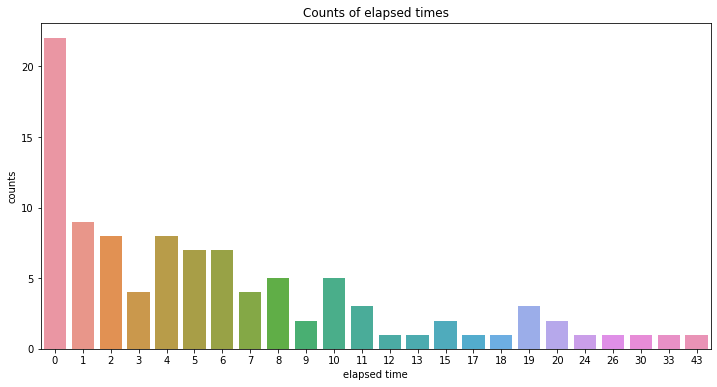

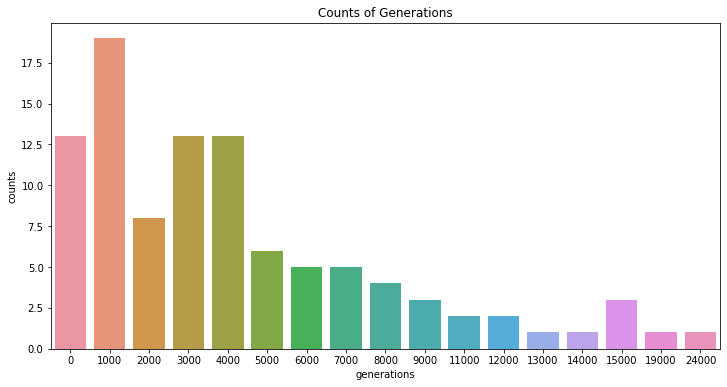

In [21]:
import os

unique_identifier = "100_25-2_population"
parent_directory = "C:\\Users\\SAB68\\repos\\samsambutdifferent\\eight-queen-problem\\results\\basic"

path = os.path.join(parent_directory, unique_identifier)

if not os.path.exists(path):
    os.mkdir(path)

config = {
    "NUMBER_OF_QUEENS": NUMBER_OF_QUEENS,
    "SIZE_OF_POPULATION": SIZE_OF_POPULATION,
    "MUTATION_FREQUENCY": MUTATION_FREQUENCY,
    "PERFECT_SCORE": PERFECT_SCORE,
    "test_file": test_populations_name
}

f = open(path + "\\config", "w")

for item in config.items():
    f.writelines(str(item) + '\n')
f.close()


import pandas as pd

results_df = pd.DataFrame(results)

mean_number_of_generations = results_df["number_of_generations"].mean()
mean_elapsed_time = results_df["elapsed_time"].mean()

std_number_of_generations = results_df["number_of_generations"].std()
std_elapsed_time = results_df["elapsed_time"].std()

print(results_df)

print(f"mean_number_of_generations: {mean_number_of_generations}")
print(f"std_number_of_generations: {std_number_of_generations}")
print(f"mean_elapsed_time: {mean_elapsed_time}")
print(f"std_elapsed_time: {std_elapsed_time}")


f = open(path + "\\metrics", "w")
f.writelines(f"mean_number_of_generations: {mean_number_of_generations}" + '\n')
f.writelines(f"std_number_of_generations: {std_number_of_generations}" + '\n')
f.writelines(f"mean_elapsed_time: {mean_elapsed_time}" + '\n')
f.writelines(f"std_elapsed_time: {std_elapsed_time}" + '\n')
f.writelines('\n')
f.write(str(results_df))
f.close()


# check all results finish
over_30_seconds = results_df[results_df["elapsed_time"] > 30]
f = open(path + "\\over_30_seconds", "w")
f.write(str(over_30_seconds))
f.close()
print("over_30_seconds")
print(over_30_seconds)


import math

def round_down_to_1000(x):
    return round(x, -3) 


floored_elapsed_time = results_df["elapsed_time"].apply(math.floor)
floored_number_of_generations = results_df["number_of_generations"].apply(round_down_to_1000)

frame = { 'elapsed_time': floored_elapsed_time, 'number_of_generations': floored_number_of_generations }

floored_results_df = pd.DataFrame(frame)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

fig = sns.barplot(x=floored_results_df.elapsed_time.value_counts().index, y=floored_results_df.elapsed_time.value_counts())

plt.xlabel("elapsed time")
plt.ylabel("counts")
plt.title("Counts of elapsed times")
plt.savefig(path + '/counts_of_elapsed_time.png')
plt.show(fig)

plt.figure(figsize=(12,6))

fig = sns.barplot(x=floored_results_df.number_of_generations.value_counts().index, y=floored_results_df.number_of_generations.value_counts())

plt.xlabel("generations")
plt.ylabel("counts")
plt.title("Counts of Generations")
plt.savefig(path + '/counts_of_generations.png')
plt.show(fig)
